In [10]:
# Import required libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import misc
from tensorflow.keras import models

In [2]:
# Loading MNIST Fashion dataset

mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Split dataset into training and testing

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the dataset

training_images = training_images/255.0
test_images = test_images/255.0


In [4]:
# Build model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4999 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2956 - accuracy: 0.8915


In [5]:
# Evaluate model 

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 1s 1ms/step - loss: 0.3569 - accuracy: 0.8739: 0s - loss: 0.3644 - accuracy: 
Test loss: 0.3568706214427948, Test accuracy: 87.38999962806702


In [6]:
# Splitting training and testing data

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Reshaping the images in the data and normalize it

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0

**here the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, you have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do that, then you'll get an error when training because the convolutions do not recognize the shape.

In [7]:
# Adding Convolution layer in the model to increase the accuracy

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [8]:
# Evaluate convolutional model 

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.2598 - accuracy: 0.9101
Test loss: 0.25979581475257874, Test accuracy: 91.0099983215332


**Now try running it for more epochs—say about 20—and explore the results. While the training results might seem really good, the validation results may actually go down due to a phenomenon called overfitting.

Overfitting occurs when the network learns the data from the training set too well, so it's specialised to recognize only that data, and as a result is less effective at seeing other data in more general situations. For example, if you trained only on heels, then the network might be very good at identifying heels, but sneakers might confuse it.

In [9]:
# Visualize the convolutions and pooling

print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


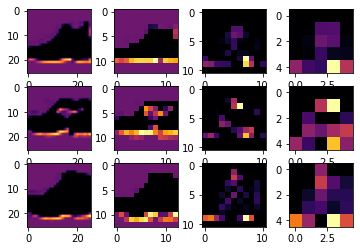

In [11]:
# Lets check the indexes for images with target 9 (Ankle shoe)

f, axarr = plt.subplots(3,4)


FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28

CONVOLUTION_NUMBER = 6

layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)